In [55]:
from functions import discrete_conv_alt as conv
from functions import discrete_conv as naive_conv
from scipy.integrate import simpson
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack as fft
from numba import njit, vectorize

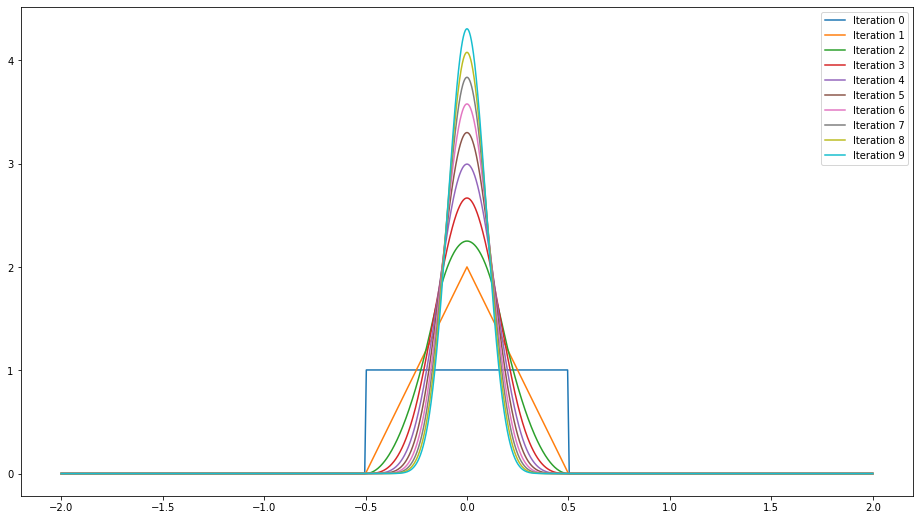

In [9]:
x = np.linspace(-2,2, 501)
dirac = np.where(np.abs(x) < .5, 1, 0)

convolution = np.copy(dirac)
plt.figure(figsize=(16,9))
for ii in range(10):
    plt.plot(x, convolution/simpson(convolution, x), '-', label=f"Iteration {ii}")
    convolution = conv(dirac, convolution)
    x = np.linspace(*x[[0,-1]], convolution.size)

plt.legend()
plt.show()

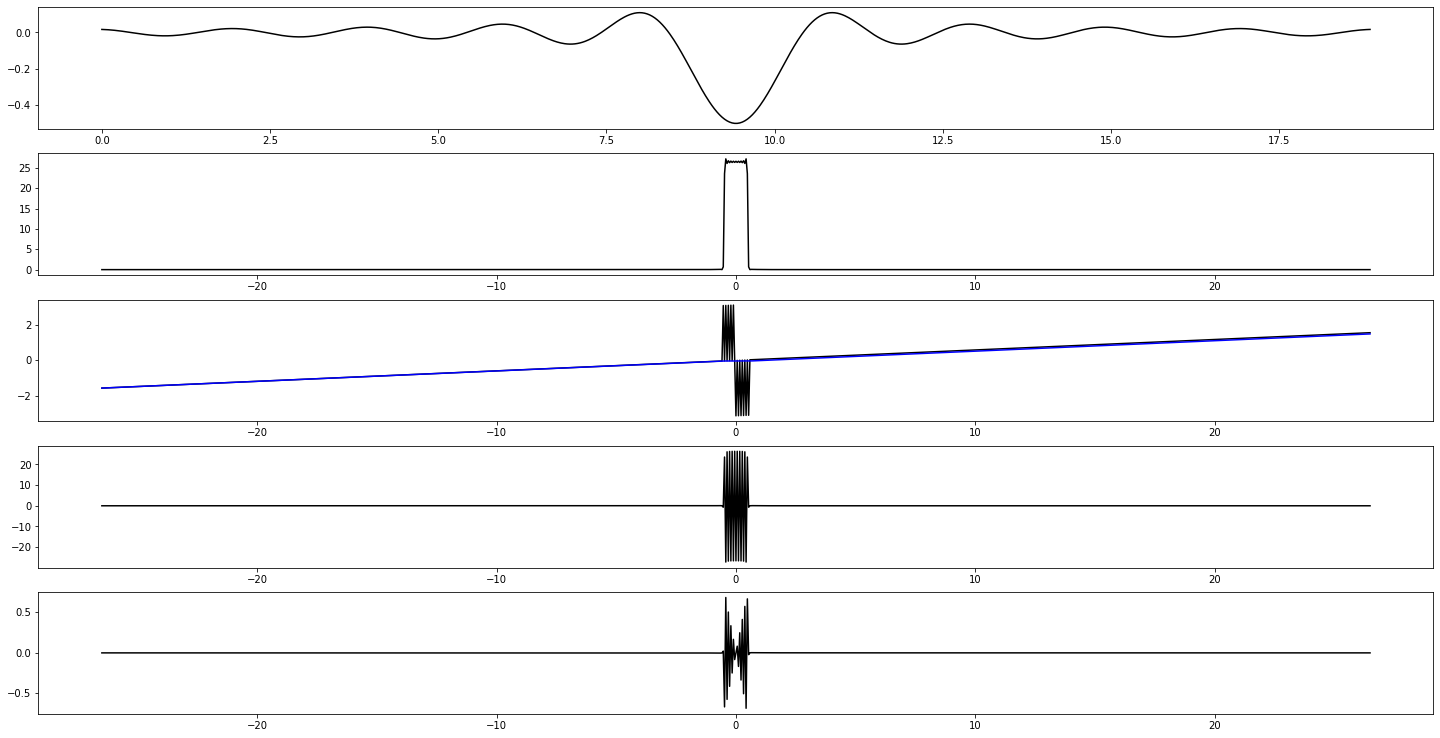

In [64]:
def unwrap_angles(angles, threshold=.5):
    unwrapped_angles = np.copy(angles)
    diffs = np.diff(angles)
    where_big = np.where(np.abs(diffs) > threshold)[0]

    for index in where_big:
        unwrapped_angles[index + 1: ] -= diffs[index]

    return unwrapped_angles

def angle_grinder(angles, sample_spacing=1):
    unwrapped_angles = np.copy(angles)
    derivative = np.gradient(angles, sample_spacing)
    where_big = np.where(np.abs(derivative) > np.mean(np.abs(derivative)))[0]

    for index in where_big:
        unwrapped_angles[index + 1: ] -= derivative[index]*sample_spacing

    return derivative

@vectorize
def normalized_sinc(x):
    return 1 if x == 0 else np.sin(np.pi*x)/(np.pi*x)


fundamental_freq = 2*np.pi
t = np.linspace(0, 3*fundamental_freq, 1001)
# frequencies = np.random.choice(np.arange(0, 5, .5), 4)
# print(np.sort(frequencies))
sinusoid = -normalized_sinc(t-3*np.pi)*.5
# sinusoid = np.sum([np.sin(fundamental_freq*ii*t) + np.cos(fundamental_freq*ii*t) for ii in frequencies], axis=0)
# sinusoid = np.sin(5*fundamental_freq*t)*np.exp(-(t-3*np.pi)**2)
# sinusoid += np.random.normal(0, .1, sinusoid.size)

frequency_amplitude = fft.fftshift(fft.fft(sinusoid))
frequency_spectrum = fft.fftshift(fft.fftfreq(t.size, d=t[1]-t[0]))

radii = np.abs(frequency_amplitude)
phases = np.angle(frequency_amplitude)
unwrapped_phases = unwrap_angles(phases, 3)

fig, ax = plt.subplots(5, figsize=(25,13))
ax[0].plot(t, sinusoid, 'k-')
ax[1].plot(frequency_spectrum, radii, 'k-')
ax[2].plot(frequency_spectrum, phases, 'k-')
ax[2].plot(frequency_spectrum, unwrapped_phases, 'b-')
ax[3].plot(frequency_spectrum, frequency_amplitude.real, 'k-')
ax[4].plot(frequency_spectrum, frequency_amplitude.imag, 'k-')

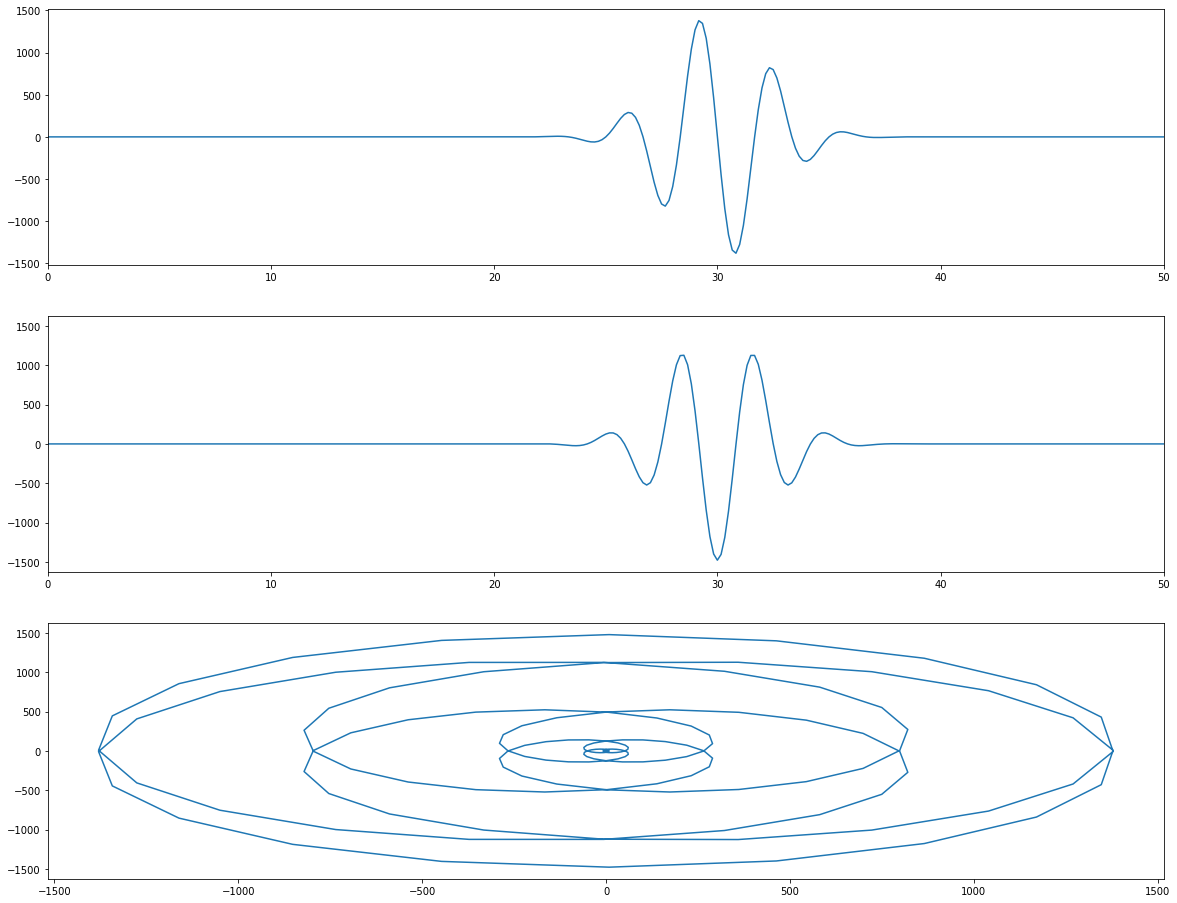

In [129]:
tau = np.linspace(-3,3,10001)
signal = np.sin(3*fundamental_freq*tau)*np.exp(-tau*tau)

fourier = fft.fft(signal, 10*tau.size)
fourier_shift = fft.fftshift(fourier)
freqs = fft.fftshift(fft.fftfreq(fourier.size, 1e-1*(tau[1] - tau[0])))

fig, (ax1,ax2,ax3) = plt.subplots(3, figsize=(20,16))

ax1.plot(freqs, fourier_shift.real)
ax1.set_xlim(0, 50)
ax2.plot(freqs, fourier_shift.imag)
ax2.set_xlim(0, 50)
ax3.plot(fourier_shift.real, fourier_shift.imag)

In [ ]:
np.convolve

In [100]:
a = np.sqrt(np.exp(-np.log(2)))
for i in range(100):
    a = a**np.sqrt(np.exp(-np.log(2)))

print(a)

0.9999999999999997


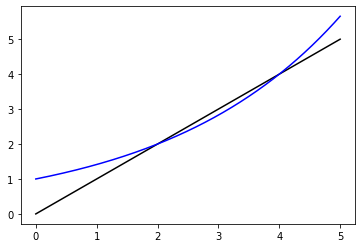

In [106]:
x = np.linspace(0, 5, 10001)
y = np.power(np.sqrt(2), x)

plt.plot(x,x, 'k-')
plt.plot(x,y, 'b-')

In [116]:

x0 = 3
advance = lambda x: np.power(np.sqrt(2), x)
x_next = x0
for ii in range(100):
    print(x_next)
    x_next = advance(x_next)

3
2.8284271247461907
2.6651441426902265
2.5185128140150885
2.393723319824126
2.292404542149578
2.2133049978163952
2.1534539887369064
2.1092454573462365
2.0771749448529166
2.05421540764181
2.037934528741221
2.0264678180071445
2.0184304960923667
2.012815933865573
2.008903086047553
2.006180679562022
2.0042887123126967
2.002974919192235
2.0020631202355337
2.001430557354164
2.000991832648391
2.000687604176611
2.0004766676903576
2.0003304281583216
2.0002290484611165
2.0001587705967268
2.00011005441936
2.000076285365315
2.0000528776848863
2.0000366523540385
2.0000254056372233
2.0000176099233387
2.0000122063059607
2.000008460784458
2.0000058645774907
2.000004065019484
2.0000028176587796
2.000001953053193
2.0000013537537726
2.0000009383508313
2.000000650415339
2.0000004508336096
2.00000031249407
2.0000002166043958
2.000000150138732
2.000000104068242
2.0000000721346103
2.0000000499999024
2.000000034657292
2.000000024022605
2.0000000166512013
2.0000000115417333
2.00000000800012
2.000000005545261


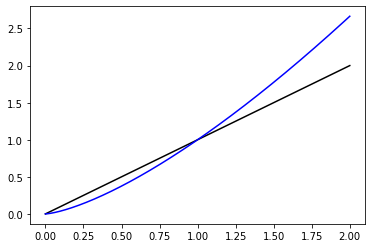

In [109]:

x = np.linspace(0, 2, 10001)
y = np.power(x, np.sqrt(2))

plt.plot(x,x, 'k-')
plt.plot(x,y, 'b-')

In [120]:
x0 = 3.
advance = lambda x: np.power(x, np.sqrt(2))
x_next = x0
for ii in range(100):
    print(x_next)
    x_next = advance(x_next)

3.0
4.728804387837416
9.000000000000004
22.361590938430407
81.00000000000011
500.04074929769325
6561.0000000000255
250040.7509581989
43046721.00000044
62520377139.74027
1853020188851887.8
3.9087975576953846e+21
3.433683820292719e+30
1.5278698347045611e+43
1.1790184577740228e+61
2.3343862318002066e+86
1.3900845237718888e+122
5.449359079218664e+172
1.9323349832302672e+244
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf


C:\Users\josep\AppData\Local\Temp/ipykernel_10992/1029108243.py:2: RuntimeWarning: overflow encountered in power
  advance = lambda x: np.power(x, np.sqrt(2))
